<a href="https://colab.research.google.com/github/Devrikh/Sem_Sec/blob/main/semantic_security_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

# --------------------------
# Helper functions
# --------------------------
def entropy(p):
    if p <= 0 or p >= 1:
        return 0
    return -p*math.log(p,2) - (1-p)*math.log(1-p,2)

def KL(p, q):
    eps = 1e-12
    p = min(max(p, eps), 1-eps)
    q = min(max(q, eps), 1-eps)
    return p*math.log(p/q, 2) + (1-p)*math.log((1-p)/(1-q), 2)


# --------------------------
# STATIC VALUES FROM CASE STUDY
# --------------------------
pB_prior = 0.32
pB_post  = 0.80
HB_prior = entropy(pB_prior)
HB_post  = entropy(pB_post)
IB = HB_prior - HB_post     # Bob info gain = 0.160 bits

pE_prior = 0.25
pE_post  = 0.50
HE_prior = entropy(pE_prior)
HE_post  = entropy(pE_post)
IE = HE_prior - HE_post     # Eve gain = -0.131 bits

SSA_single = IB - IE         # 0.291 bits per round
Leakage_single = abs(IE)     # 0.131 bits per round

KL_BE_single = KL(pB_post, pE_post)


# --------------------------
# 20-ROUND STATIC SIMULATION
# --------------------------
rounds = 20
records = []

cum_IB = 0
cum_IE = 0
cum_SSA = 0
cum_leak = 0

for t in range(1, rounds+1):
    cum_IB += IB
    cum_IE += IE
    cum_SSA += SSA_single
    cum_leak += Leakage_single

    records.append({
        "Round": t,
        "Bob_InfoGain": IB,
        "Eve_InfoGain": IE,
        "SSA": SSA_single,
        "Leakage": Leakage_single,

        "Cumulative_Bob_Info": cum_IB,
        "Cumulative_Eve_Info": cum_IE,
        "Cumulative_SSA": cum_SSA,
        "Cumulative_Leakage": cum_leak,

        "KL_B_E": KL_BE_single
    })

df = pd.DataFrame(records)
df


,Round,Bob_InfoGain,Eve_InfoGain,SSA,Leakage,Cumulative_Bob_Info,Cumulative_Eve_Info,Cumulative_SSA,Cumulative_Leakage,KL_B_E
0,1,0.182453,-0.188722,0.371175,0.188722,0.182453,-0.188722,0.371175,0.188722,0.278072
1,2,0.182453,-0.188722,0.371175,0.188722,0.364907,-0.377444,0.742350,0.377444,0.278072
2,3,0.182453,-0.188722,0.371175,0.188722,0.547360,-0.566166,1.113526,0.566166,0.278072
3,4,0.182453,-0.188722,0.371175,0.188722,0.729813,-0.754888,1.484701,0.754888,0.278072
4,5,0.182453,-0.188722,0.371175,0.188722,0.912267,-0.943609,1.855876,0.943609,0.278072
5,6,0.182453,-0.188722,0.371175,0.188722,1.094720,-1.132331,2.227051,1.132331,0.278072
6,7,0.182453,-0.188722,0.371175,0.188722,1.277174,-1.321053,2.598227,1.321053,0.278072
7,8,0.182453,-0.188722,0.371175,0.188722,1.459627,-1.509775,2.969402,1.509775,0.278072
8,9,0.182453,-0.188722,0.371175,0.188722,1.642080,-1.698497,3.340577,1.698497,0.278072
9,10,0.182453,-0.188722,0.371175,0.188722,1.824534,-1.887219,3.711752,1.887219,0.278072


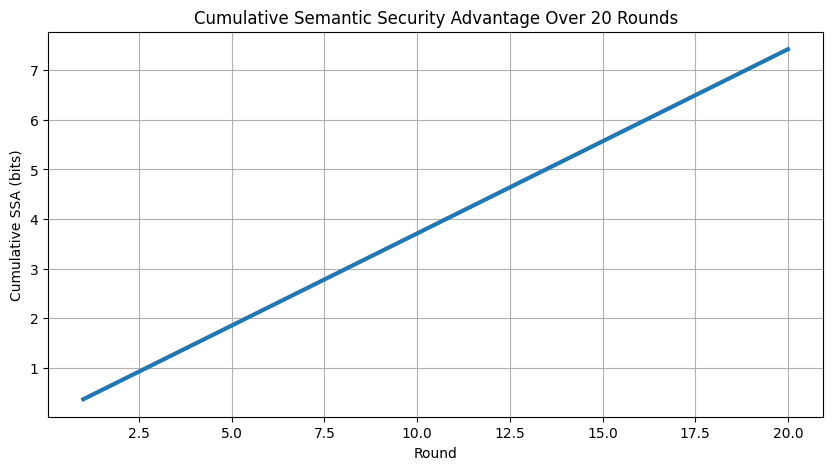

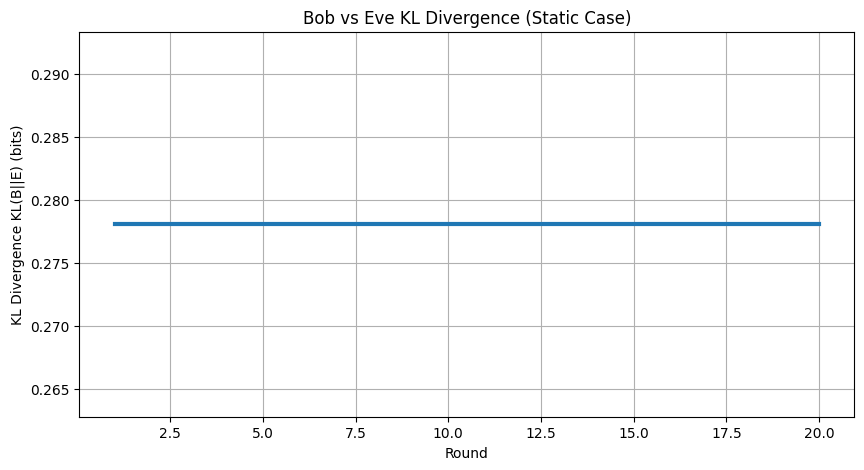

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df["Round"], df["Cumulative_SSA"], linewidth=3)
plt.xlabel("Round")
plt.ylabel("Cumulative SSA (bits)")
plt.title("Cumulative Semantic Security Advantage Over 20 Rounds")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df["Round"], df["KL_B_E"], linewidth=3)
plt.xlabel("Round")
plt.ylabel("KL Divergence KL(B||E) (bits)")
plt.title("Bob vs Eve KL Divergence (Static Case)")
plt.grid(True)
plt.show()
